# GUIA 1 - Procesamiento de Imagenes
Grupo 4 <br>
Integrantes:
- Pablo Smolkin
- Pedro Carranza Vélez
- Philippe Dutriez Diaz
- Francisco Daniel Ledesma

***

In [4]:
import sys
sys.path.append("D:/Documents/repos/Digital-Image-Processing/") # Path to repository

In [5]:
from common.functions import *
from TP1_Vision.functions import *

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***

### Ejercicio 1
Modelamos el ojo como un sistema lente-sensor Podemos simplificar nuestro modelo
asumiendo que el “sensor” está compuesto por los conos, con una densidad constante de
150000 elementos por mm2, y posee un área de 1.5mm x 1.5mm.<br>
Suponiendo que dejamos de ver algo cuando el área de la imagen del objeto se hace menor
que el tamaño de un cono del sensor, calcular el tamaño del menor punto visible sobre una
pantalla de LCD de un celular que se encuentra a 30 cm de nuestros ojos. Comparar este
resultado con el tamaño de los pixeles en los teléfonos modernos.

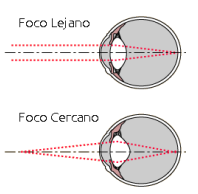

In [7]:
density = 150000 # cones/mm^2
area = 1.5**2 #mm2
n_cones = density*area
print("Number of cones:", n_cones)

Number of cones: 337500.0


In [8]:
cone_area = 1/density
cone_side =  math.sqrt(cone_area)*1e-3 #meters
print("Cone side:", round(cone_side*1e6,4), "µm")

Cone side: 2.582 µm


### Calculo minimo tamaño que se puede resolver

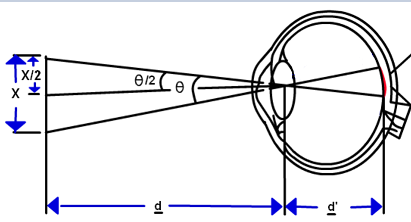

In [10]:
d = 300 #mm distance eye-object
d_prima = 17 #mm
X = cone_side*d/d_prima
print("Assuming d'=17mm -> Minimum size:",round(X*1e6,2),"µm")
d_prima = 14 #mm distancia focal asumiendo foco cercano
X = cone_side*d/d_prima 
print("Assuming d'=14mm -> Minimum size:",round(X*1e6,2),"µm")

Assuming d'=17mm -> Minimum size: 45.56 µm
Assuming d'=14mm -> Minimum size: 55.33 µm


### Calculo el tamaño de pixel de pantalla

In [11]:
screen_density_iphone13 = 460 #pixels per inches
print("Iphone 13 ->", end=' ')
getPixelSize(screen_density_iphone13)
screen_density_xiaomiMi8 = 402 #pixels per inches
print("Xiaomi Xiaomi Redmi Note 8 pro ->", end=' ')
getPixelSize(screen_density_xiaomiMi8)

Iphone 13 -> Pixel size: 55.2174 µm
Xiaomi Xiaomi Redmi Note 8 pro -> Pixel size: 63.1841 µm


### Conclusion
Se puede apreciar que el tamaño de pixel de las pantallas de celulares modernos es del mismo orden de magnitud que el minimo tamaño que el ojo humano puede resolver. Siendo incluso un poco menor en algun caso el tamaño de pixel del iphone 13. Esto permite que, a nuestros ojos, no podamos distinguir entre un pixel y otro logrando que veamos la pantalla como un continuo.

***

### Ejercicio 2
Se tiene una cámara con una distancia focal de 35mm, con un CCD de 10mm x 10mm con 1
Mpixel de resolución (pixeles cuadrados). Usando esa cámara se toma una fotografía de una
superficie plana totalmente enfocada ubicada a 1m de distancia. Calcular cuántos milímetros
representa una distancia de un pixel sobre dicha imagen.


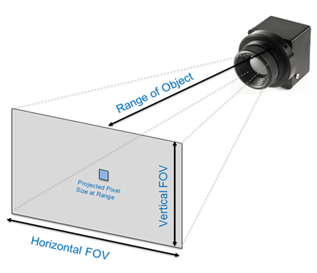

In [12]:
dist_foc = 35 # mm
ccd_cam = 10 # mm
res_cam = 1e6 # pixels 
dist_obj = 1 # m
h_fov = ccd_cam*dist_obj/dist_foc
ppm = math.sqrt(res_cam)/(h_fov*1000)
print(f"Image width and length: {np.round(h_fov,3)} meters. \nMilimeters per pixel: {np.round(1/ppm,3)} mmpp.")


Image width and length: 0.286 meters. 
Milimeters per pixel: 0.286 mmpp.


Como el CCD es un cuadrado de 10 x 10 mm, supusimos que la resolución es de 1080 x 1080 pixeles, redondeando a 1000 pixeles para el calculo.

***

### Ejercicio 3
Medir la resolución real de una cámara (puede ser de celular) y comparar el valor obtenido
con el valor comercial. A tal fin diseñe un experimento fotografiando un ábaco de referencia
como el que se adjunta en el archivo iso-rag.jpg. Compare el valor de la resolución de la
cámara fija (apoyada, o con trípode) con el valor de la resolución sosteniendo la cámara con
las manos y saque conclusiones. Tener en cuenta la resolución de la impresora en relación a
la distancia de fotografiado. Para realizar la comparación utilice el mismo nivel de
iluminación.

### Camara: Xiaomi Redmi Note 8 pro
#### Especificaciones:
- 12MP



#### Camara fija
- Resolucion 3472 x 3472
- Distancia camara papel de 84cm
- Se observa en la imagen que 

3472 3472


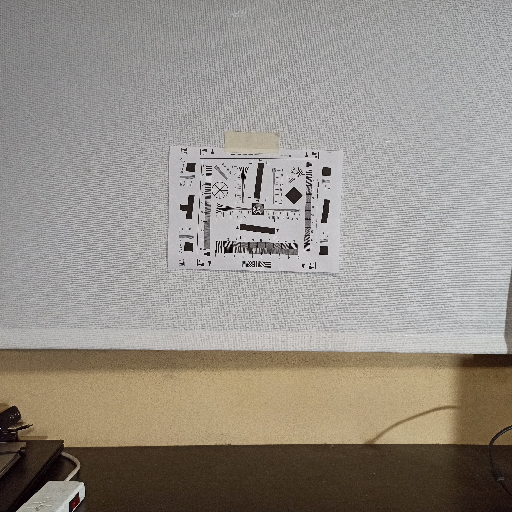

In [13]:
tripod_img = Image.open("img_ej3/ej3_tripod.jpg")
w, h = tripod_img.size
print(w, h)
displayImage(tripod_img, 512, 512)

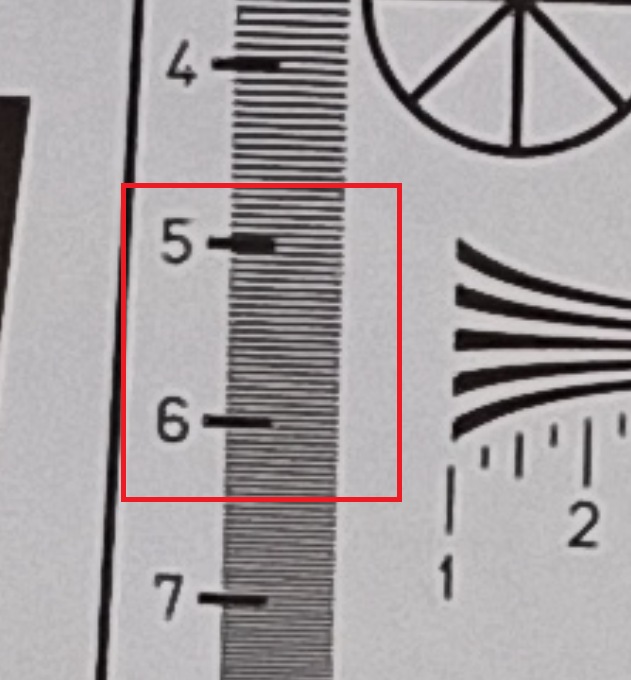

In [14]:
ancho_linea = 0.44 #mm
area_a4 = 210*297 #mm^2
pixeles_hoja = area_a4/(ancho_linea**2)
pixel_v_a4 = round(210/0.44) #pixels
pixel_h_a4 = round(297/0.44) #pixels
per_a4 = pixel_v_a4*pixel_h_a4/(w*h)
print("pixels totales con camara fija:",round(pixeles_hoja/per_a4*1e-6,4),"MP")

pixels totales con camara fija: 12.0617 MP


#### Sosteniendo la camara con las manos
- Resolucion 3472 x 3472
- Distancia camara papel de 84cm
- Se observa en la imagen que 

3472 3472


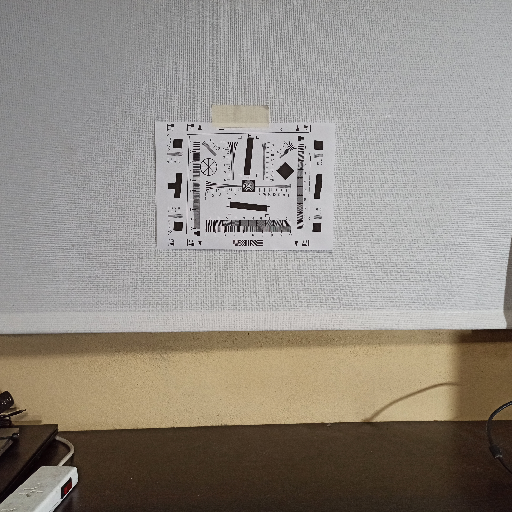

In [15]:
hand_img = Image.open("img_ej3/ej3_hand.jpg")
w, h = hand_img.size
print(w, h)
displayImage(hand_img, 512, 512)

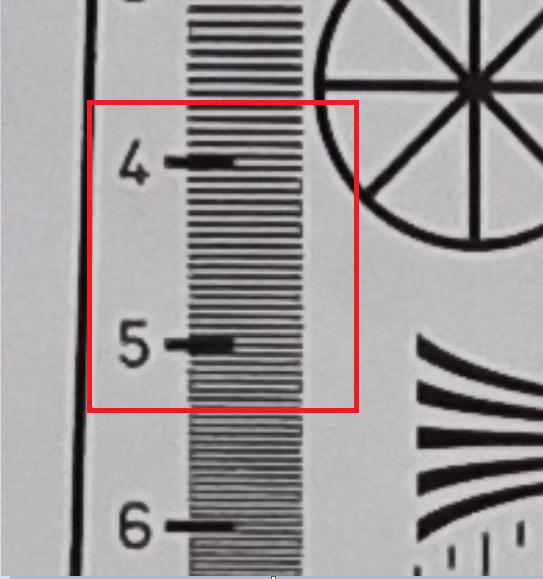

In [16]:
ancho_linea = 0.48 #mm
area_a4 = 210*297 #mm^2
pixeles_hoja = area_a4/(ancho_linea**2)
pixel_v_a4 = round(210/0.44) #pixels
pixel_h_a4 = round(297/0.44) #pixels
per_a4 = pixel_v_a4*pixel_h_a4/(w*h)
print("pixels totales =",round(pixeles_hoja/per_a4*1e-6,4),"MP")

pixels totales = 10.1352 MP


***

### Ejercicio 4. 
Generar  en  Matlab  dos  imágenes  de  3  pixeles  x  3  pixeles.  En  ambos  casos  el  pixel  central debe tener un valor de 127. Los pixeles vecinos deben tener un valor de 63, y 223 en cada caso.

La luminancia del pixel central es la misma en cada caso, pero perceptualmente no poseen el  mismo  brillo.  Variar  la  luminancia  del  pixel  central  de  una  de  las  imágenes,  hasta  que perceptualmente ambas posean el mismo brillo. ¿Qué valor se obtiene? Probar con diferentes valores para los pixeles externos. Extraer conclusiones.

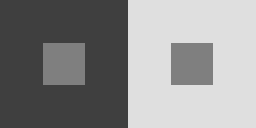

In [17]:
sq1 = makeSquare(sides_value=63, center_value=127)
sq2 = makeSquare(sides_value=223, center_value=127)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

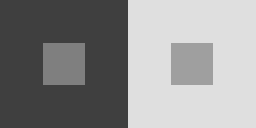

In [18]:
sq1 = makeSquare(sides_value=63, center_value=127)
sq2 = makeSquare(sides_value=223, center_value=159)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

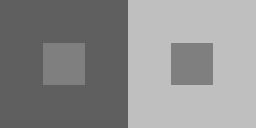

In [19]:
sq1 = makeSquare(sides_value=95, center_value=127)
sq2 = makeSquare(sides_value=191, center_value=127)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

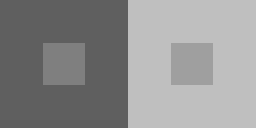

In [20]:
sq1 = makeSquare(sides_value=95, center_value=127)
sq2 = makeSquare(sides_value=191, center_value=159)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

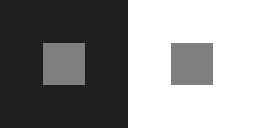

In [21]:
sq1 = makeSquare(sides_value=31, center_value=127)
sq2 = makeSquare(sides_value=255, center_value=127)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

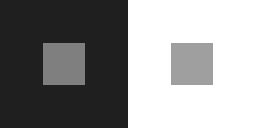

In [22]:
sq1 = makeSquare(sides_value=31, center_value=127)
sq2 = makeSquare(sides_value=255, center_value=159)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

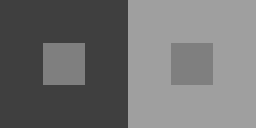

In [23]:
sq1 = makeSquare(sides_value=63, center_value=127)
sq2 = makeSquare(sides_value=159, center_value=127)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

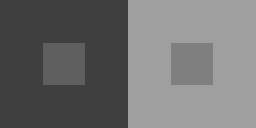

In [24]:
sq1 = makeSquare(sides_value=63, center_value=95)
sq2 = makeSquare(sides_value=159, center_value=127)

squares = Image.fromarray(np.concatenate((sq1, sq2), axis=1))
displayImage(squares, 256, 128)

Observando los tres ejemplos anteriores, el factor que parece conseguir el mismo brillo perceptual es la diferencia entre la luminosidad de los bordes y la del pixel central.

En la realización de los distintos casos de ejemplo, notamos que la intensidad no es una función lineal. Parece ser de forma logarítmica.

Por otro lado, la diferencia en calibración gamma de los monitores de los distintos integrantes del grupo resultó en desacuerdos en cuanto a los contrastes en las imágenes.

***

### Ejercicio 5. 
#### Se desea decimar la imagen "mono.bmp"

256 256


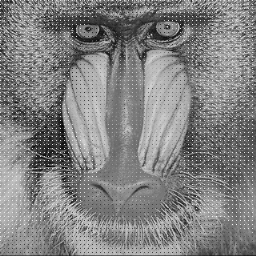

In [25]:
harambe = Image.open("consigna/mono.bmp")
w, h = harambe.size
print(w, h)
displayImage(harambe, 256, 256)

#### Dividir la imágen en bloques de 4x4 pixeles, y quedarse con el pixel en la posición (1,1) 

Con nuestro tiling:

In [26]:
N, M = 4, 4
im_tiled = tileImage(harambe, N, M)

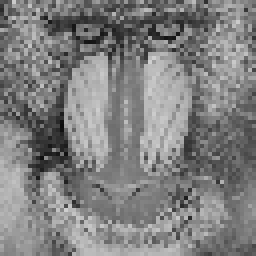

In [27]:
mat_A = pickPixelfromTile(im_tiled, (1,1))
img_A = Image.fromarray(mat_A)
displayImage(img_A, 256, 256)

Con skimage:

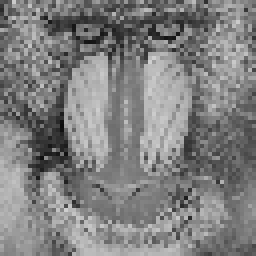

In [28]:
mat_A = block_reduce(np.asarray(harambe), block_size=(4, 4), func=lambda blocks, pixel_pos, axis: pickPixelfromTile(blocks, pixel_pos), func_kwargs={'pixel_pos': (1,1)})
img_A = Image.fromarray(mat_A)
displayImage(img_A, 256, 256)

#### Repetir la decimación tomando el pixel en la posición (0,0) 

Con nuestro tiling:

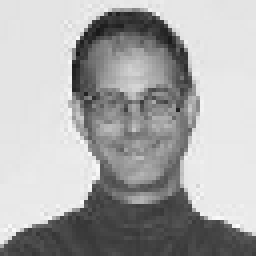

In [29]:
mat_B = pickPixelfromTile(im_tiled, (0,0))
img_B = Image.fromarray(mat_B)
displayImage(img_B, 256, 256)

Con skimage:

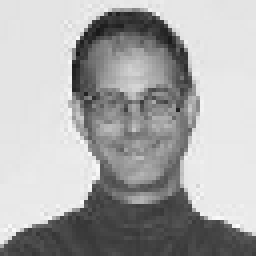

In [30]:
mat_B = block_reduce(np.asarray(harambe), block_size=(4, 4), func=lambda blocks, pixel_pos, axis: pickPixelfromTile(blocks, pixel_pos), func_kwargs={'pixel_pos': (0,0)})
img_B = Image.fromarray(mat_B)
displayImage(img_B, 256, 256)

#### Repetir tomando el promedio de los 16 puntos

Con nuestro tiling:

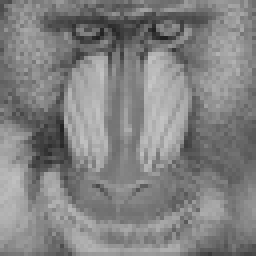

In [31]:
mat_C = avgTiles(im_tiled)
img_C = Image.fromarray(mat_C)
displayImage(img_C, 256, 256)

Con skimage:

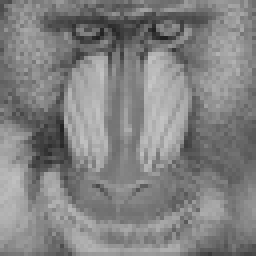

In [32]:
mat_C = block_reduce(np.asarray(harambe), block_size=(4, 4), func=np.mean).astype(np.uint8)
img_C = Image.fromarray(mat_C)
displayImage(img_C, 256, 256)

### Interpolación Bilinear
A continuación se expande la imagen comprimida de vuelta a la resolución original por medio de un algoritmo de interpolación bilinear desarrollada por el grupo.

In [33]:
from TP1_Vision.interpolation import *

#### Decimación tomando el pixel (1,1)

CPU times: total: 969 ms
Wall time: 999 ms


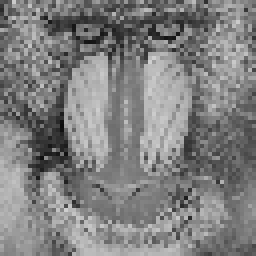

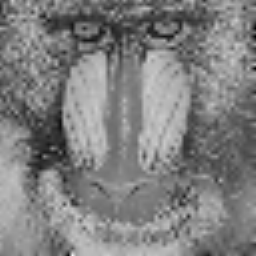

In [34]:
%time bilinear_mat_A = bilinear_interpolation(mat_A, (256,256))
bilinear_img_A = Image.fromarray(bilinear_mat_A).convert("L")
displayImage(img_A, 256, 256)
displayImage(bilinear_img_A, 256, 256)

#### Decimación tomando el pixel (0,0)

CPU times: total: 953 ms
Wall time: 1.01 s


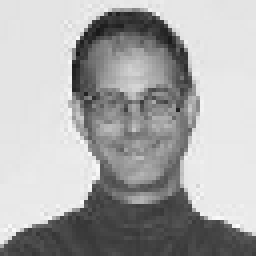

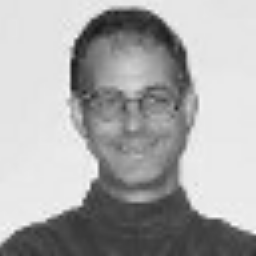

In [35]:
%time bilinear_mat_B = bilinear_interpolation(mat_B, (256,256))
bilinear_img_B = Image.fromarray(bilinear_mat_B).convert("L")
displayImage(img_B, 256, 256)
displayImage(bilinear_img_B, 256, 256)

#### Decimación tomando el promedio

CPU times: total: 1.02 s
Wall time: 1.06 s


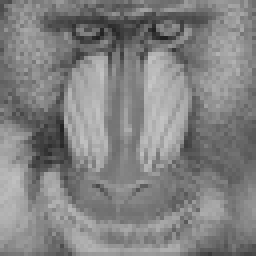

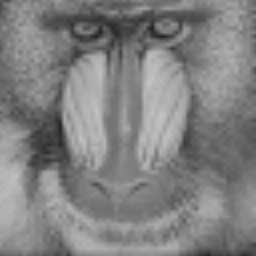

In [36]:
%time bilinear_mat_C = bilinear_interpolation(mat_C, (256,256))
bilinear_img_C = Image.fromarray(bilinear_mat_C).convert("L")
displayImage(img_C, 256, 256)
displayImage(bilinear_img_C, 256, 256)

### Interpolación Bicubica
A continuación se expande la imagen comprimida de vuelta a la resolución original por medio de un algoritmo de interpolación bicubica desarrollada por el grupo. Se utiliza un coeficiente para el kernel de interpolación de a = -0.75.

In [37]:
from TP1_Vision.interpolation import *

In [38]:
# Bicubic interpolation kernel coefficient
a = -0.75

#### Decimación tomando el pixel (1,1)

CPU times: total: 12.4 s
Wall time: 13.5 s


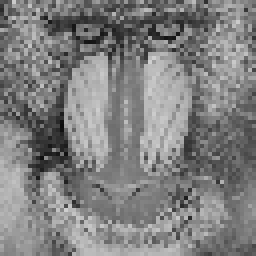

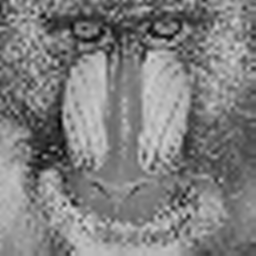

In [39]:
%time bicubic_mat_A = bicubic_interpolation(mat_A, (256,256), a)
bicubic_img_A = Image.fromarray(bicubic_mat_A).convert("L")
displayImage(img_A, 256, 256)
displayImage(bicubic_img_A, 256, 256)

#### Decimación tomando el pixel (0,0)

CPU times: total: 29.7 s
Wall time: 32.7 s


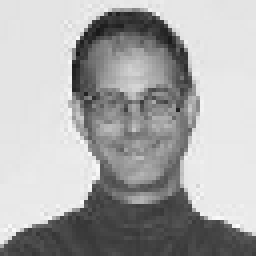

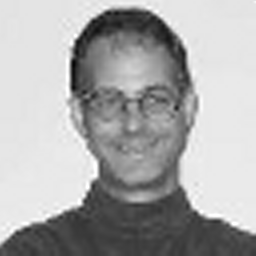

In [40]:
%time bicubic_mat_B = bicubic_interpolation(mat_B, (256,256), a)
bicubic_img_B = Image.fromarray(bicubic_mat_B).convert("L")
displayImage(img_B, 256, 256)
displayImage(bicubic_img_B, 256, 256)

#### Decimación tomando el promedio

CPU times: total: 10.5 s
Wall time: 11.8 s


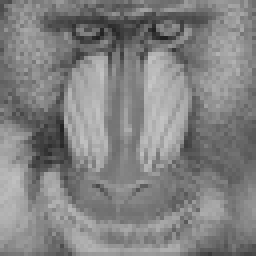

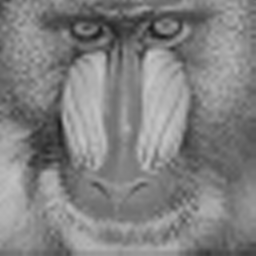

In [41]:
%time bicubic_mat_C = bicubic_interpolation(mat_C, (256,256), a)
bicubic_img_C = Image.fromarray(bicubic_mat_C).convert("L")
displayImage(img_C, 256, 256)
displayImage(bicubic_img_C, 256, 256)

### Espectro de la imagen original
A continuación se grafica el espectro de la imagen original.

In [42]:
import numpy as np
from matplotlib import pyplot as plt

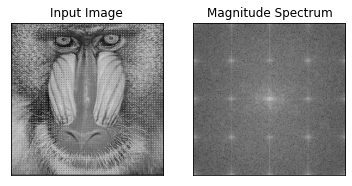

In [43]:
spectrum = np.fft.fft2(harambe)
shifted_spectrum = np.fft.fftshift(spectrum) # Put 0Hz in the center of the image
magnitude_spectrum = 20*np.log(np.abs(shifted_spectrum))

plt.subplot(121),plt.imshow(harambe, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Se puede observar que la imagen tiene un alto componente espectral, desde el cero (centro del espectro) hacia las altas frecuencias (los bordes del espectro). El valor en el cero en cierta manera corresponde con el valor medio de la imagen en general. Mientras tanto, que se tengan valores considerables lejos del centro nos trae una idea de que la imagen cuenta con un gran nivel de detalle (a nivel cualitativo), ya que pensar que observer componentes de alta frecuencia sería equivalente (en el espacio) a una alta variedad de valores. Tambíen pueden observarse pícos en el espectro. Teniendo en cuenta la asociación previa entre frecuencias en el espectro y nivel de detalle, podrían pensarse estos pícos como las tasas mas comunes de cambios en la imagen, que en parte nos informan de la calidad de la imagen. Es decir, estos picos estan directamente relacionados al bitrate de la imagen.
Ya que la decimación en parte actua como un decremento de la calidad de la imagen, podría pensarse en terminos de la frecuencia como un filtrado de las frecuencias altas. A continuación se observa el espectro del resultado de una de las decimación.

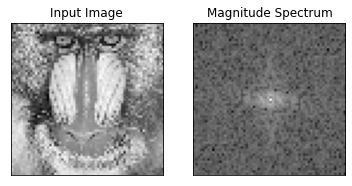

In [46]:
spectrum2 = np.fft.fft2(mat_A)
shifted_spectrum2 = np.fft.fftshift(spectrum2) # Put 0Hz in the center of the image
magnitude_spectrum2 = 20*np.log(np.abs(shifted_spectrum2))

plt.subplot(121),plt.imshow(mat_A, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum2, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

En particular se tomó la decimación tomando el punto (1,1), pero el proceso en cuanto al espectro sería indistinto de con que pixel se tome la decimación. Igualmente, se puede observar que se realiza lo esperado: se obsesrva en el espectro (cualitativamente) valores menores fuera del cero luego de realizar la decimación.
En cuanto a la decimación por promedio, ya que un promediador ya es un pasas-bajos digital, se observa claramente como decimar filtraría las altas frecuencias de una imagen.
